<a href="https://colab.research.google.com/github/offmannn/a1/blob/master/Pet_classy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

🇫🇷☝not used

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs=64

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path=untar_data(url='https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet',fname='/root/.fastai/data/oxford-iiit-pet1',dest='/content/drive/My Drive',data=True,force_download=False)
path

PosixPath('/content/drive/My Drive/oxford-iiit-pet')

In [0]:
path=untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

not used ,

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/oxford-iiit-pet/images'),
 PosixPath('/content/drive/My Drive/oxford-iiit-pet/annotations')]

In [0]:
path_anno=path/'annotations'
path_img=path/'images'

In [0]:
fnames=get_image_files(path_img)
fnames[:5]

[PosixPath('/content/drive/My Drive/oxford-iiit-pet/images/Siamese_87.jpg'),
 PosixPath('/content/drive/My Drive/oxford-iiit-pet/images/chihuahua_126.jpg'),
 PosixPath('/content/drive/My Drive/oxford-iiit-pet/images/german_shorthaired_97.jpg'),
 PosixPath('/content/drive/My Drive/oxford-iiit-pet/images/Bombay_157.jpg'),
 PosixPath('/content/drive/My Drive/oxford-iiit-pet/images/Bengal_12.jpg')]

In [0]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$'

In [0]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

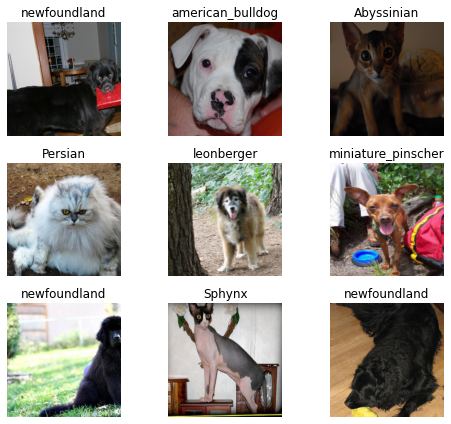

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.401196,0.337652,0.112314,01:48
1,0.628382,0.264159,0.082544,01:45
2,0.373416,0.229434,0.073072,01:45
3,0.279180,0.205070,0.063599,01:43


In [0]:
learn.save('stage-1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

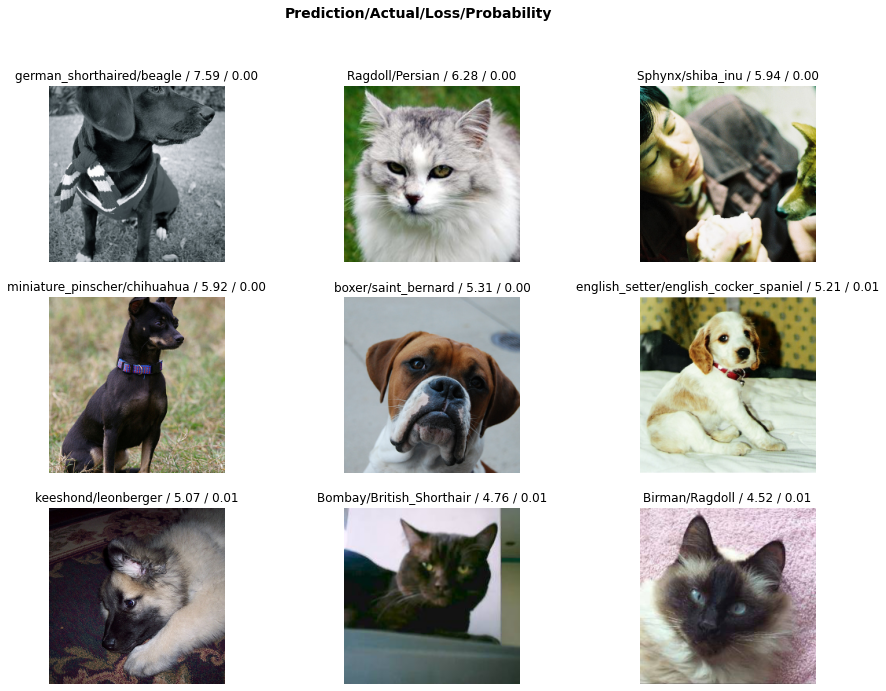

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

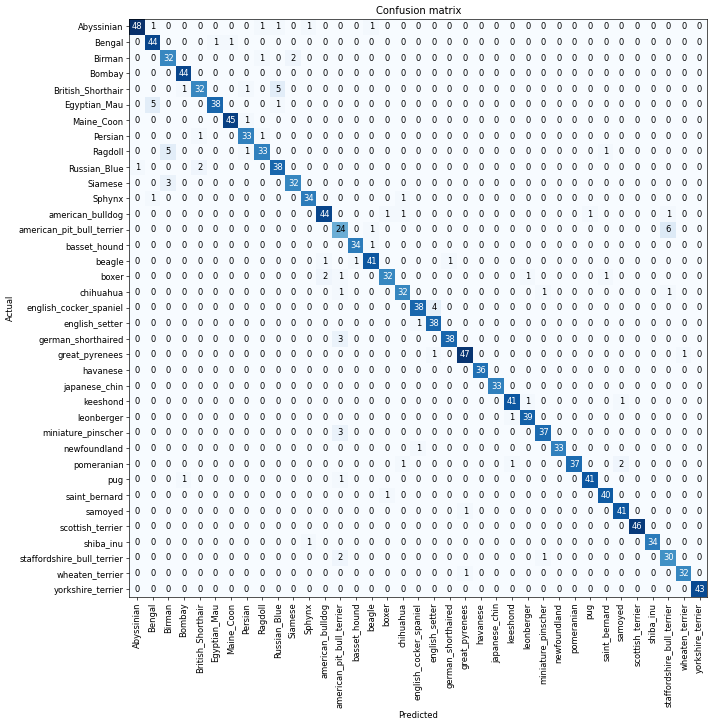

In [0]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 5),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('Siamese', 'Birman', 3),
 ('german_shorthaired', 'american_pit_bull_terrier', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('Birman', 'Siamese', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('boxer', 'american_bulldog', 2),
 ('pomeranian', 'samoyed', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.675391,0.424130,0.128552,01:43


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,chihuahua,german_shorthaired,japanese_chin,havanese
Path: /content/drive/My Drive/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,american_bulldog,Persian,Egyptian_Mau,shiba_inu
Path: /content/drive/My Drive/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


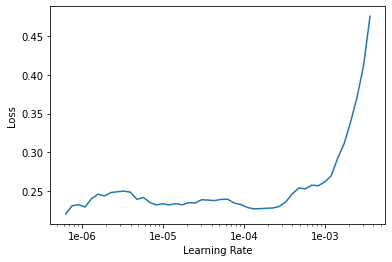

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.238624,0.199617,0.061570,01:42
1,0.203964,0.193512,0.056834,01:43


In [0]:
learn.save('stage-2')

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/oxford-iiit-pet/images'),
 PosixPath('/content/drive/My Drive/oxford-iiit-pet/annotations')]

In [0]:
learn.export()